Untuk membuat aplikasi pengenalan emosi (emotion recognition) menggunakan ChatGPT dalam Python, Anda bisa memanfaatkan teknik-teknik dalam bidang Natural Language Processing (NLP)

## Preprocessing Data

Pertama, mari kita coba memuat dan memproses data pelatihan Anda:

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

Found 48 images belonging to 6 classes.
Found 12 images belonging to 6 classes.


## Membuat Model

Setelah memastikan bahwa data Anda dapat dimuat dan diproses dengan benar, buat dan latih model Anda. Sebagai contoh, berikut adalah contoh model Convolutional Neural Network (CNN) sederhana:

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Jumlah unit harus sama dengan jumlah kelas

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Model

Setelah memastikan bahwa model dapat dibangun dengan benar, cobalah melatih model dengan data pelatihan Anda:

In [25]:
# Train the model and save the history
history = model.fit(train_generator, validation_data=validation_generator, epochs=100)

Epoch 1/100


2023-07-11 17:14:43.330600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/2 [==============>...............] - ETA: 1s - loss: 0.8482 - accuracy: 0.6875

2023-07-11 17:14:44.559336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 1s 335ms/step - loss: 0.7589 - accuracy: 0.7292 - val_loss: 2.3828 - val_accuracy: 0.2500
Epoch 2/100
2/2 [==============================] - 0s 184ms/step - loss: 0.6996 - accuracy: 0.7708 - val_loss: 2.5175 - val_accuracy: 0.1667
Epoch 3/100
2/2 [==============================] - 0s 121ms/step - loss: 0.6378 - accuracy: 0.8542 - val_loss: 2.6410 - val_accuracy: 0.2500
Epoch 4/100
2/2 [==============================] - 0s 164ms/step - loss: 0.7145 - accuracy: 0.7708 - val_loss: 2.1680 - val_accuracy: 0.3333
Epoch 5/100
2/2 [==============================] - 0s 166ms/step - loss: 0.6174 - accuracy: 0.7708 - val_loss: 2.2620 - val_accuracy: 0.4167
Epoch 6/100
2/2 [==============================] - 0s 127ms/step - loss: 0.5907 - accuracy: 0.8333 - val_loss: 2.6005 - val_accuracy: 0.2500
Epoch 7/100
2/2 [==============================] - 0s 118ms/step - loss: 0.5247 - accuracy: 0.8958 - val_loss: 2.5369 - val_accuracy: 0.2500
Epoch 8/100
2/2 [========

## Visualisasi Loss dan Accuracy Training

Jika Anda ingin memvisualisasikan loss dan akurasi selama pelatihan, Anda dapat menggunakan objek history yang dikembalikan oleh metode fit.

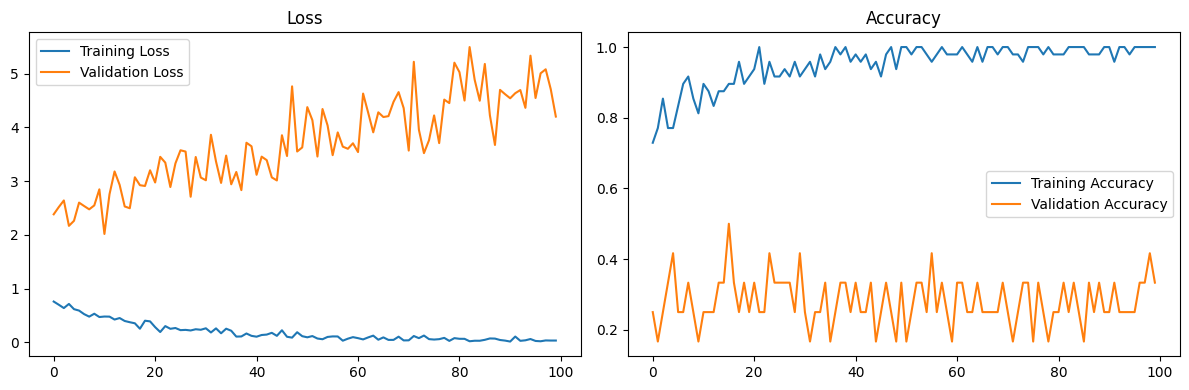

In [26]:
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

## Simpan Model di Folder Model

Anda dapat menggunakan metode save pada model untuk menyimpan model Keras Anda. Pastikan folder model sudah ada.

In [27]:
# Save the model
model.save('model/emotion_model.h5')

## Membuat Kode untuk Menguji dengan Foto Lainnya

Anda dapat memuat model yang telah Anda simpan dan menggunakannya untuk membuat prediksi pada gambar baru.

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = load_model('model/cnn/best_model.h5')

# Load the image
img = image.load_img('dataset/test/happy/PublicTest_9537841.jpg', target_size=(48, 48), color_mode='grayscale')

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

# Make a prediction
prediction = model.predict(img_array)

# Get the class of the prediction
predicted_class = np.argmax(prediction[0])

# Define class labels
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

# Translate the predicted class into its label
predicted_label = class_labels[predicted_class]

print(f'The model predicts class: {predicted_label}')

1/1 [==============================] - 0s 127ms/step
The model predicts class: sad
